Taking package from https://github.com/PokemonTCG/pokemon-tcg-sdk-python

In [2]:
pip install pokemontcgsdk

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pokemontcgsdk import Card
from pokemontcgsdk import Set
from pokemontcgsdk import Type
from pokemontcgsdk import Supertype
from pokemontcgsdk import Subtype
from pokemontcgsdk import Rarity

In [141]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import pyplot

%matplotlib inline

import json
from dataclasses import asdict

In [407]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score,fbeta_score
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, recall_score, make_scorer
from sklearn.linear_model import LogisticRegression 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Data Preparation

## Data Gathering

In [6]:
# Filter cards via query parameters
sample_cards = Card.where(q='set.name:generations subtypes:mega')
print(sample_cards)

[Card(abilities=None, artist='5ban Graphics', ancientTrait=None, attacks=[Attack(name='Bloom Buster', cost=['Grass', 'Grass', 'Colorless', 'Colorless'], convertedEnergyCost=4, damage='130', text="Flip a coin. If heads, this attack does 30 damage to each of your opponent's Benched Pokémon. (Don't apply Weakness and Resistance for Benched Pokémon.)")], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/g1-2', updatedAt='2021/08/25', prices=CardmarketPrices(averageSellPrice=8.51, lowPrice=2.9, trendPrice=7.87, germanProLow=None, suggestedPrice=None, reverseHoloSell=None, reverseHoloLow=None, reverseHoloTrend=8.37, lowPriceExPlus=8.0, avg1=9.0, avg7=8.07, avg30=8.29, reverseHoloAvg1=7.49, reverseHoloAvg7=6.75, reverseHoloAvg30=7.59)), convertedRetreatCost=4, evolvesFrom='Venusaur-EX', flavorText=None, hp='230', id='g1-2', images=CardImage(small='https://images.pokemontcg.io/g1/2.png', large='https://images.pokemontcg.io/g1/2_hires.png'), legalities=Legality(unlimited='Legal

In [8]:
# Easier to see format

json_object = asdict(sample_cards[0])

json_formatted_str = json.dumps(json_object, indent=2)

print(json_formatted_str)

{
  "abilities": null,
  "artist": "5ban Graphics",
  "ancientTrait": null,
  "attacks": [
    {
      "name": "Bloom Buster",
      "cost": [
        "Grass",
        "Grass",
        "Colorless",
        "Colorless"
      ],
      "convertedEnergyCost": 4,
      "damage": "130",
      "text": "Flip a coin. If heads, this attack does 30 damage to each of your opponent's Benched Pok\u00e9mon. (Don't apply Weakness and Resistance for Benched Pok\u00e9mon.)"
    }
  ],
  "cardmarket": {
    "url": "https://prices.pokemontcg.io/cardmarket/g1-2",
    "updatedAt": "2021/08/25",
    "prices": {
      "averageSellPrice": 8.51,
      "lowPrice": 2.9,
      "trendPrice": 7.87,
      "germanProLow": null,
      "suggestedPrice": null,
      "reverseHoloSell": null,
      "reverseHoloLow": null,
      "reverseHoloTrend": 8.37,
      "lowPriceExPlus": 8.0,
      "avg1": 9.0,
      "avg7": 8.07,
      "avg30": 8.29,
      "reverseHoloAvg1": 7.49,
      "reverseHoloAvg7": 6.75,
      "reverseHoloAvg

In [10]:
# Pull all data of ALL cards
cards = Card.all()

In [12]:
card_list = []

for card in range(0, len(cards)):
    card_list.append(asdict(cards[card]))

In [36]:
# Create Dataframe with specific fields
FIELDS = ["id", "name", "set.name","set.releaseDate","supertype","subtypes","rarity","cardmarket.prices.averageSellPrice",
          "cardmarket.prices.avg1", "cardmarket.prices.avg7", "cardmarket.prices.avg30"]

card_df = pd.json_normalize(card_list)

display(card_df[FIELDS])

,id,name,set.name,set.releaseDate,supertype,subtypes,rarity,cardmarket.prices.averageSellPrice,cardmarket.prices.avg1,cardmarket.prices.avg7,cardmarket.prices.avg30
0,pl3-1,Absol G,Supreme Victors,2009/08/19,Pokémon,[Basic],Rare Holo,4.18,2.50,4.18,3.15
1,ex12-1,Aerodactyl,Legend Maker,2006/02/01,Pokémon,[Stage 1],Rare Holo,9.43,5.36,9.21,6.99
2,xy5-1,Weedle,Primal Clash,2015/02/04,Pokémon,[Basic],Common,0.07,0.06,0.06,0.07
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019/10/15,Pokémon,[Basic],Promo,0.96,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004/11/01,Pokémon,[Stage 1],Rare Holo,3.20,4.99,2.33,2.77
...,...,...,...,...,...,...,...,...,...,...,...
13680,swsh6-229,Urn of Vitality,Chilling Reign,2021/06/18,Trainer,"[Item, V, Single Strike]",Rare Secret,13.08,9.99,12.62,14.12
13681,swsh6-230,Welcoming Lantern,Chilling Reign,2021/06/18,Trainer,"[Item, Single Strike]",Rare Secret,15.66,15.00,14.80,15.15
13682,swsh6-231,Water Energy,Chilling Reign,2021/06/18,Energy,[Basic],Rare Secret,20.46,14.99,18.25,21.84
13683,swsh6-232,Psychic Energy,Chilling Reign,2021/06/18,Energy,[Basic],Rare Secret,22.13,15.00,20.64,21.83


## Data Cleaning

In [248]:
df = card_df.copy()[FIELDS]

In [249]:
df.rename(columns={'name':'card_name', 'set.name':'set_name','supertype':'card_type','subtypes':'subtype','cardmarket.prices.averageSellPrice':'avg_price','set.releaseDate':'release_date','cardmarket.prices.avg1':'1_day_$_avg','cardmarket.prices.avg7':'7_day_$_avg', 'cardmarket.prices.avg30':'30_day_$_avg'}, inplace=True)

In [250]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')

In [251]:
df

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
0,pl3-1,Absol G,Supreme Victors,2009-08-19,Pokémon,[Basic],Rare Holo,4.18,2.50,4.18,3.15
1,ex12-1,Aerodactyl,Legend Maker,2006-02-01,Pokémon,[Stage 1],Rare Holo,9.43,5.36,9.21,6.99
2,xy5-1,Weedle,Primal Clash,2015-02-04,Pokémon,[Basic],Common,0.07,0.06,0.06,0.07
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019-10-15,Pokémon,[Basic],Promo,0.96,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004-11-01,Pokémon,[Stage 1],Rare Holo,3.20,4.99,2.33,2.77
...,...,...,...,...,...,...,...,...,...,...,...
13680,swsh6-229,Urn of Vitality,Chilling Reign,2021-06-18,Trainer,"[Item, V, Single Strike]",Rare Secret,13.08,9.99,12.62,14.12
13681,swsh6-230,Welcoming Lantern,Chilling Reign,2021-06-18,Trainer,"[Item, Single Strike]",Rare Secret,15.66,15.00,14.80,15.15
13682,swsh6-231,Water Energy,Chilling Reign,2021-06-18,Energy,[Basic],Rare Secret,20.46,14.99,18.25,21.84
13683,swsh6-232,Psychic Energy,Chilling Reign,2021-06-18,Energy,[Basic],Rare Secret,22.13,15.00,20.64,21.83


In [252]:
# Checking for missing data
df.isna().sum()

id                0
card_name         0
set_name          0
release_date      0
card_type         0
subtype         184
rarity           77
avg_price       539
1_day_$_avg     105
7_day_$_avg     105
30_day_$_avg    105
dtype: int64

In [253]:
null_data = df[df.isnull().any(axis=1)]
null_data

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
6,ru1-1,Venusaur,Pokémon Rumble,2009-12-02,Pokémon,[Stage 2],None,20.00,20.00,24.64,11.40
33,ru1-2,Cherrim,Pokémon Rumble,2009-12-02,Pokémon,[Stage 1],None,NaN,14.99,5.37,2.10
52,si1-1,Mew,Southern Islands,2001-07-31,Pokémon,[Basic],None,70.01,60.00,82.08,42.54
60,si1-2,Pidgeot,Southern Islands,2001-07-31,Pokémon,[Stage 2],None,18.83,12.00,17.70,14.34
81,ru1-3,Ninetales,Pokémon Rumble,2009-12-02,Pokémon,[Stage 1],None,NaN,7.99,12.35,4.23
...,...,...,...,...,...,...,...,...,...,...,...
12951,sm10-223,Honchkrow-GX,Unbroken Bonds,2019-05-03,Pokémon,"[Stage 1, GX]",Rare Rainbow,NaN,19.98,16.34,10.55
12961,sm10-225,Gardevoir & Sylveon-GX,Unbroken Bonds,2019-05-03,Pokémon,"[Basic, TAG TEAM, GX]",Rare Rainbow,NaN,55.00,41.63,28.83
13016,sm11-250,Cherish Ball,Unified Minds,2019-08-02,Trainer,[Item],Rare Secret,NaN,18.00,16.80,16.14
13027,sm11-258,Weakness Guard Energy,Unified Minds,2019-08-02,Energy,[Special],Rare Secret,NaN,9.77,8.83,11.55


In [254]:
# Average Sell Price is top data category. 
# Cannot be calculated based on day averages as it is the all time value
# Dropping rows with missing

df.dropna(subset=['avg_price','rarity','subtype'], inplace = True)

In [255]:
# Checking for missing data
df.isna().sum()

id              0
card_name       0
set_name        0
release_date    0
card_type       0
subtype         0
rarity          0
avg_price       0
1_day_$_avg     0
7_day_$_avg     0
30_day_$_avg    0
dtype: int64

In [256]:
# Cleaned data
df

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
0,pl3-1,Absol G,Supreme Victors,2009-08-19,Pokémon,[Basic],Rare Holo,4.18,2.50,4.18,3.15
1,ex12-1,Aerodactyl,Legend Maker,2006-02-01,Pokémon,[Stage 1],Rare Holo,9.43,5.36,9.21,6.99
2,xy5-1,Weedle,Primal Clash,2015-02-04,Pokémon,[Basic],Common,0.07,0.06,0.06,0.07
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019-10-15,Pokémon,[Basic],Promo,0.96,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004-11-01,Pokémon,[Stage 1],Rare Holo,3.20,4.99,2.33,2.77
...,...,...,...,...,...,...,...,...,...,...,...
13680,swsh6-229,Urn of Vitality,Chilling Reign,2021-06-18,Trainer,"[Item, V, Single Strike]",Rare Secret,13.08,9.99,12.62,14.12
13681,swsh6-230,Welcoming Lantern,Chilling Reign,2021-06-18,Trainer,"[Item, Single Strike]",Rare Secret,15.66,15.00,14.80,15.15
13682,swsh6-231,Water Energy,Chilling Reign,2021-06-18,Energy,[Basic],Rare Secret,20.46,14.99,18.25,21.84
13683,swsh6-232,Psychic Energy,Chilling Reign,2021-06-18,Energy,[Basic],Rare Secret,22.13,15.00,20.64,21.83


## Feature Engineering

In [257]:
# Setting index
df.set_index('id', inplace=True)

In [314]:
# Cardmarket prices are in euros need to convert values to US Dollar
df['avg_price'] = df['avg_price'] * 1.18
df['1_day_$_avg'] = df['1_day_$_avg'] * 1.18
df['7_day_$_avg'] = df['7_day_$_avg'] * 1.18
df['30_day_$_avg'] = df['30_day_$_avg'] * 1.18

# Round to 2 digit decimals
df = df.round(decimals=2)
df

,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
id,,,,,,,,,,
base1-15,Venusaur,Base,1999-01-09,Pokémon,[Stage 2],Rare Holo,131.25,83.79,144.28,110.38
base1-41,Seel,Base,1999-01-09,Pokémon,[Basic],Uncommon,1.98,1.39,1.76,1.91
base1-56,Onix,Base,1999-01-09,Pokémon,[Basic],Common,1.59,0.24,1.37,1.59
base1-51,Koffing,Base,1999-01-09,Pokémon,[Basic],Common,2.08,3.42,2.30,1.86
base1-101,Psychic Energy,Base,1999-01-09,Energy,[Basic],Common,0.54,0.02,0.26,0.53
...,...,...,...,...,...,...,...,...,...,...
swsh6-88,Passimian,Chilling Reign,2021-06-18,Pokémon,"[Basic, Rapid Strike]",Rare,0.24,0.30,0.21,0.25
swsh6-89,Sandaconda V,Chilling Reign,2021-06-18,Pokémon,"[Basic, V]",Rare Holo V,1.69,1.33,2.06,1.69
swsh6-90,Sandaconda VMAX,Chilling Reign,2021-06-18,Pokémon,[VMAX],Rare Holo VMAX,5.11,6.29,5.50,5.16


In [265]:
# Rarity splits
# Currently too many types

In [364]:
# Total years past since set emerged
time_df = pd.DataFrame(index=df.index.values.tolist())

from datetime import date

today = date.today()
time_df['today'] = pd.to_datetime(today)

# Year Difference
df['age_days'] = (time_df['today'] - df['release_date']).dt.days

In [366]:
df

,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg,age_days
id,,,,,,,,,,,
base1-15,Venusaur,Base,1999-01-09,Pokémon,[Stage 2],Rare Holo,131.25,83.79,144.28,110.38,8271
base1-41,Seel,Base,1999-01-09,Pokémon,[Basic],Uncommon,1.98,1.39,1.76,1.91,8271
base1-56,Onix,Base,1999-01-09,Pokémon,[Basic],Common,1.59,0.24,1.37,1.59,8271
base1-51,Koffing,Base,1999-01-09,Pokémon,[Basic],Common,2.08,3.42,2.30,1.86,8271
base1-101,Psychic Energy,Base,1999-01-09,Energy,[Basic],Common,0.54,0.02,0.26,0.53,8271
...,...,...,...,...,...,...,...,...,...,...,...
swsh6-88,Passimian,Chilling Reign,2021-06-18,Pokémon,"[Basic, Rapid Strike]",Rare,0.24,0.30,0.21,0.25,75
swsh6-89,Sandaconda V,Chilling Reign,2021-06-18,Pokémon,"[Basic, V]",Rare Holo V,1.69,1.33,2.06,1.69,75
swsh6-90,Sandaconda VMAX,Chilling Reign,2021-06-18,Pokémon,[VMAX],Rare Holo VMAX,5.11,6.29,5.50,5.16,75


In [294]:
# Separate Subtype
# Basic
# Other
df_test = pd.DataFrame(df['subtype'].values.tolist())

display(df_test[0].value_counts())
display(df_test[1].value_counts())
display(df_test[2].value_counts())

Basic                      6494
Stage 1                    3296
Stage 2                    1103
Supporter                   572
Item                        522
Pokémon Tool                219
Stadium                     162
Special                     160
VMAX                        107
MEGA                         79
Level-Up                     72
BREAK                        31
Technical Machine            24
Baby                         19
LEGEND                       18
Restored                     13
Rocket's Secret Machine      10
GX                            8
Goldenrod Game Corner         2
Pokémon Tool F                1
Name: 0, dtype: int64

EX               521
GX               440
V                251
TAG TEAM         110
Single Strike     58
Rapid Strike      57
Name: 1, dtype: int64

GX               110
Single Strike     16
Rapid Strike      14
Name: 2, dtype: int64

In [332]:
def create_df_from_listentry(df, col_name):
    '''
    Takes a column of lists (col_name) from a dataframe (df)
    
    Returns a dataframe with number of columns equal to max list size 
    and each element of the row list in its own column  
    '''
    new_df = df[col_name].apply(pd.Series)
    new_df = new_df.rename(columns = lambda x : col_name + '_' + str(x))
    return new_df

def create_dummy_from_listentries(df, col_name):
    '''
    Takes a column of lists (col_name) from a dataframe (df)
    
    Returns a dataframe with dummy variables representing
    each unique element of the lists in aggregate
    '''
    list_df = create_df_from_listentry(df, col_name)
    df_cols = list_df.columns.tolist()
    df_dummy = pd.DataFrame()
    for col in df_cols:
        if df_dummy.empty:
            df_dummy = pd.get_dummies(list_df[col], prefix='subtype')
        else:
#            df_dummy.add(pd.get_dummies(list_df[col], prefix='subtype'))
            temp = (pd.get_dummies(list_df[col], prefix='subtype'))
            df_dummy = pd.concat([df_dummy,temp], axis=1)
            df_dummy = df_dummy.loc[:,~df_dummy.columns.duplicated()]
    return df_dummy

In [336]:
subtype_df = create_dummy_from_listentries(df, 'subtype')
subtype_df.head()

,subtype_BREAK,subtype_Baby,subtype_Basic,subtype_GX,subtype_Goldenrod Game Corner,subtype_Item,subtype_LEGEND,subtype_Level-Up,subtype_MEGA,subtype_Pokémon Tool,...,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_Rapid Strike,subtype_Single Strike,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-15,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
base1-41,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-56,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-51,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-101,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
subtype_df.loc['swsh6-88']

subtype_BREAK                      0
subtype_Baby                       0
subtype_Basic                      1
subtype_GX                         0
subtype_Goldenrod Game Corner      0
subtype_Item                       0
subtype_LEGEND                     0
subtype_Level-Up                   0
subtype_MEGA                       0
subtype_Pokémon Tool               0
subtype_Pokémon Tool F             0
subtype_Restored                   0
subtype_Rocket's Secret Machine    0
subtype_Special                    0
subtype_Stadium                    0
subtype_Stage 1                    0
subtype_Stage 2                    0
subtype_Supporter                  0
subtype_Technical Machine          0
subtype_VMAX                       0
subtype_EX                         0
subtype_Rapid Strike               1
subtype_Single Strike              0
subtype_TAG TEAM                   0
subtype_V                          0
Name: swsh6-88, dtype: uint8

# Exploring Data

In [259]:
df.sort_values(by='release_date', inplace=True)
df

,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
id,,,,,,,,,,
base1-15,Venusaur,Base,1999-01-09,Pokémon,[Stage 2],Rare Holo,111.23,71.01,122.27,93.54
base1-41,Seel,Base,1999-01-09,Pokémon,[Basic],Uncommon,1.68,1.18,1.49,1.62
base1-56,Onix,Base,1999-01-09,Pokémon,[Basic],Common,1.35,0.20,1.16,1.35
base1-51,Koffing,Base,1999-01-09,Pokémon,[Basic],Common,1.76,2.90,1.95,1.58
base1-101,Psychic Energy,Base,1999-01-09,Energy,[Basic],Common,0.46,0.02,0.22,0.45
...,...,...,...,...,...,...,...,...,...,...
swsh6-88,Passimian,Chilling Reign,2021-06-18,Pokémon,"[Basic, Rapid Strike]",Rare,0.20,0.25,0.18,0.21
swsh6-89,Sandaconda V,Chilling Reign,2021-06-18,Pokémon,"[Basic, V]",Rare Holo V,1.43,1.13,1.75,1.43
swsh6-90,Sandaconda VMAX,Chilling Reign,2021-06-18,Pokémon,[VMAX],Rare Holo VMAX,4.33,5.33,4.66,4.37


In [263]:
# Rarity Count
df['rarity'].value_counts()

# common, uncommmon, rare (unfoiled)
# Rare Holo
# Rare Ultra, EX, GX, V, VMAX, X
# Rare Secret
# Promo

Common             3482
Uncommon           3299
Rare               1931
Rare Holo          1412
Promo               786
Rare Ultra          464
Rare Holo EX        300
Rare Secret         233
Rare Holo V         207
Rare Rainbow        202
Rare Holo GX        152
Rare Shiny          149
Rare Holo VMAX       54
Rare Holo LV.X       53
Rare Shiny GX        35
Rare BREAK           26
Rare Prime           26
Rare Prism Star      23
Rare Holo Star       22
LEGEND               18
Rare Shining         16
Rare ACE             13
Amazing Rare          9
Name: rarity, dtype: int64

C:\Users\leebr\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price', ylabel='card_name'>

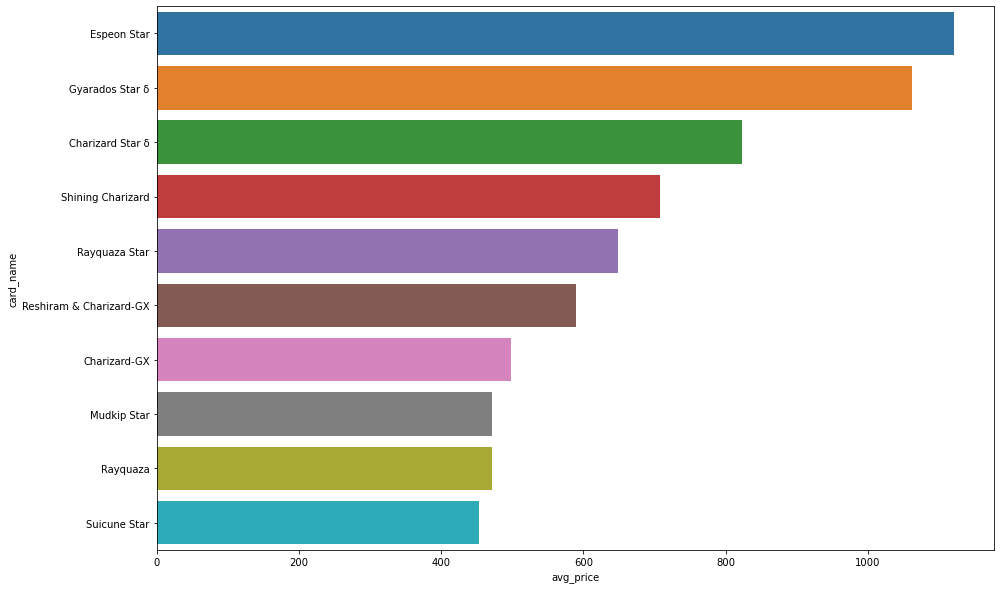

In [260]:
# Top valued cards 
fig, ax = plt.subplots(figsize=(15, 10))

y = df.nlargest(10, ['avg_price'])['card_name']
x = df.nlargest(10, ['avg_price'])['avg_price']

sns.barplot(x, y)

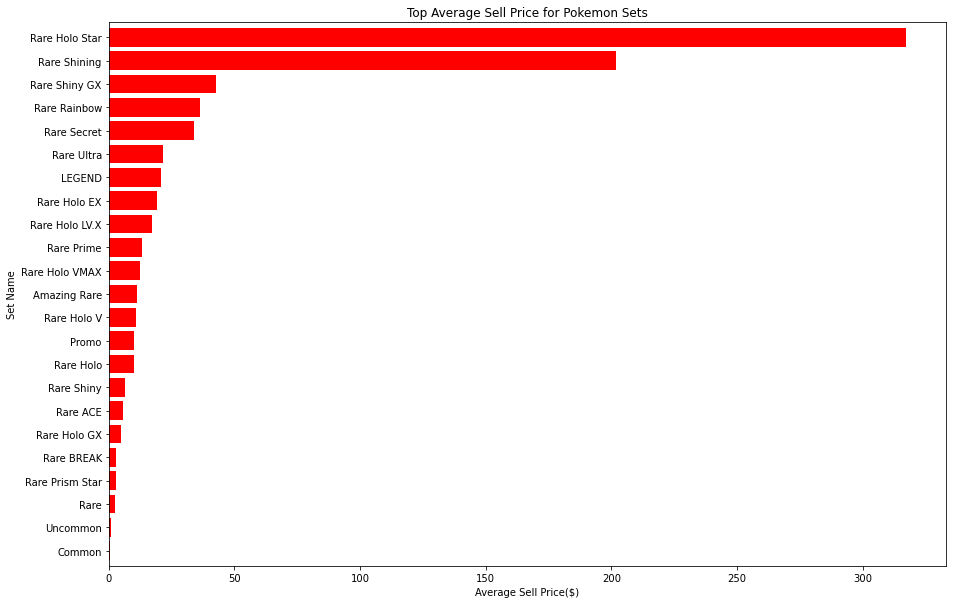

In [261]:
# Top Rarities
fig, ax = plt.subplots(figsize=(15, 10))
ax = df.groupby(['rarity'])['avg_price'].mean().sort_values().plot(kind='barh', width=0.8, color='red')
ax.set_title("Top Average Sell Price for Pokemon Sets")
ax.set_ylabel("Set Name")
ax.set_xlabel("Average Sell Price($)");

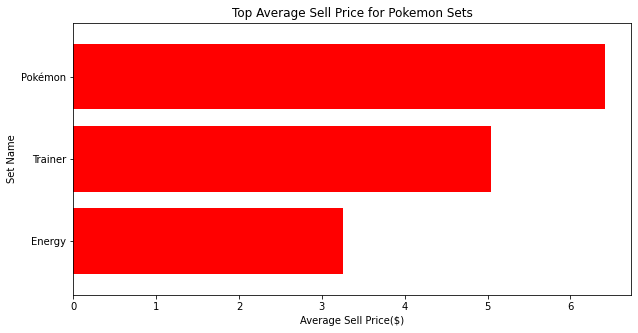

In [262]:
# Top Card Types
fig, ax = plt.subplots(figsize=(10, 5))
ax = df.groupby(['card_type'])['avg_price'].mean().sort_values().plot(kind='barh', width=0.8, color='red')
ax.set_title("Top Average Sell Price for Pokemon Sets")
ax.set_ylabel("Set Name")
ax.set_xlabel("Average Sell Price($)");

# Modeling

In [413]:
# Create blank copy for initial modeling
model_df = df.copy()

# Dropping Card Names (too many differing names), concating subtype features, release date removed
model_df.drop(columns=['card_name','set_name','release_date','subtype','1_day_$_avg','7_day_$_avg','30_day_$_avg'],inplace=True)

model_df = pd.concat([model_df,subtype_df], axis=1)
model_df.head()

,card_type,rarity,avg_price,age_days,subtype_BREAK,subtype_Baby,subtype_Basic,subtype_GX,subtype_Goldenrod Game Corner,subtype_Item,...,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_Rapid Strike,subtype_Single Strike,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-15,Pokémon,Rare Holo,131.25,8271,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
base1-41,Pokémon,Uncommon,1.98,8271,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-56,Pokémon,Common,1.59,8271,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-51,Pokémon,Common,2.08,8271,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-101,Energy,Common,0.54,8271,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [415]:
# One hot Encoder
import category_encoders as ce

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['card_type','rarity'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [416]:
#Fit and transform Data
data_encoded = encoder.fit_transform(model_df)
data_encoded

C:\Users\leebr\anaconda3\envs\learn-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,card_type_Pokémon,card_type_Energy,card_type_Trainer,rarity_Rare Holo,rarity_Uncommon,rarity_Common,rarity_Rare,rarity_Promo,rarity_Rare Secret,rarity_Rare Shining,...,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_Rapid Strike,subtype_Single Strike,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
base1-41,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-56,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-51,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swsh6-88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
swsh6-89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
swsh6-90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [417]:
# Float to Integer
data_encoded = data_encoded.astype('int')
data_encoded

,card_type_Pokémon,card_type_Energy,card_type_Trainer,rarity_Rare Holo,rarity_Uncommon,rarity_Common,rarity_Rare,rarity_Promo,rarity_Rare Secret,rarity_Rare Shining,...,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_Rapid Strike,subtype_Single Strike,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-15,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
base1-41,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-56,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-51,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-101,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swsh6-88,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
swsh6-89,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
swsh6-90,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [418]:
# Create X,y and train/test
X = data_encoded.drop(columns=['avg_price'], axis=1)
y = data_encoded['avg_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

## Decision Trees

In [438]:
# Set up initial forest
trees = DecisionTreeRegressor()
trees.fit(X_train, y_train)

DecisionTreeRegressor()

In [439]:
# Plotting feature importance of models
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,18))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize=10, fontweight='bold') 
    plt.xlabel('Importance of Cause', fontsize=16, fontweight='bold' )
    plt.ylabel('Causes',fontsize=16, fontweight='bold')
    plt.grid(linestyle='--', linewidth=2, axis='x', alpha=0.3)
    plt.title("Impact of Factors on Telecom Customer Churning", fontsize=15, fontweight='bold')

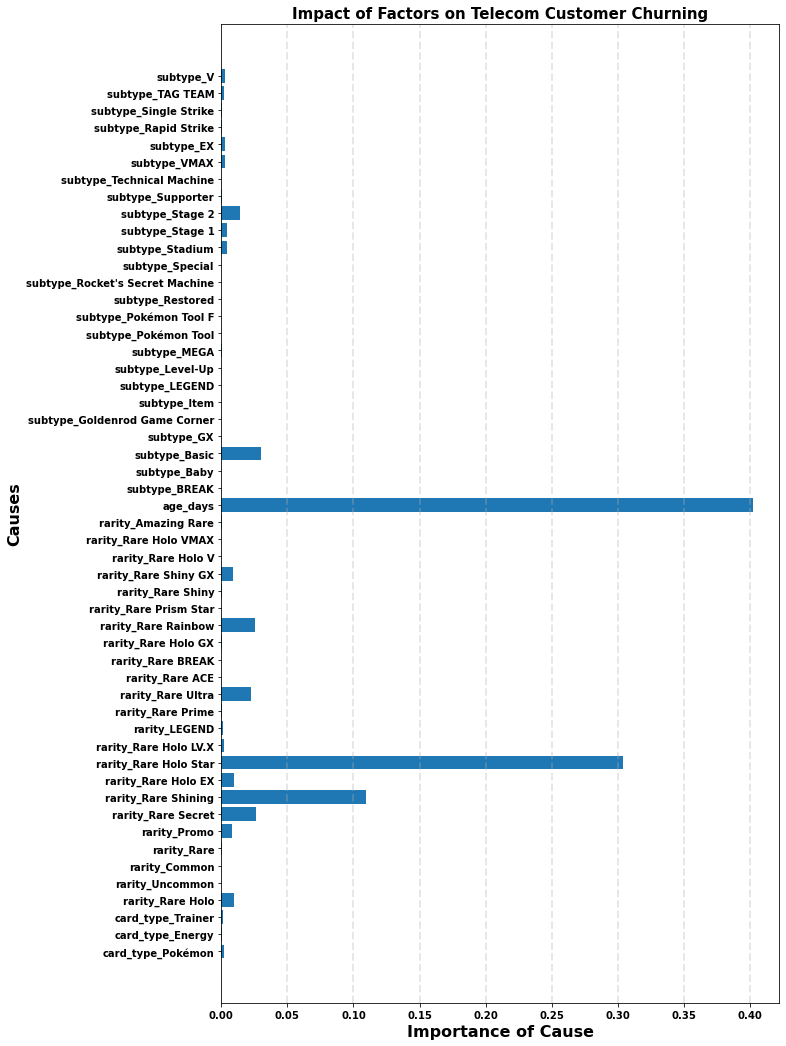

In [440]:
plot_feature_importances(trees)

In [441]:
# Test set predictions
y_hat_train = trees.predict(X_train)
y_hat_test = trees.predict(X_test)

In [442]:
# Significant score calculations
def score_cal(y_train, y_hat_train, y_test, y_hat_test):
    print(f'R^2 Score of Train: {metrics.r2_score(y_train, y_hat_train)}')
    print(f'RMSE of Train: {np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))}')
    print(f'RMSE of Test: {np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))}')
    print(f'Mean Absolute Error of Train: {metrics.mean_absolute_error(y_train, y_hat_train)}')
    print(f'Mean Absolute Error of Test: {metrics.mean_absolute_error(y_test, y_hat_test)}')
    return

In [443]:
score_cal(y_train, y_hat_train, y_test, y_hat_test)

R^2 Score of Train: 0.6518736242871859
RMSE of Train: 19.549621238970346
RMSE of Test: 30.0854510885139
Mean Absolute Error of Train: 3.67250614077967
Mean Absolute Error of Test: 5.326420969594283


## Random Forest

In [445]:
# Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [447]:
# Finding the best parameters
param_grid = {
    'max_depth': [2, 5, 10, 25],
    'min_samples_split': [2, 5, 10, 20]
}

gs_forest = GridSearchCV(forest, param_grid, cv=3, scoring=make_scorer(mean_squared_error, squared=False))
gs_forest.fit(X_train, np.ravel(y_train))

gs_forest.best_params_
                         
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_hat_train = gs_forest.predict(X_train)
y_hat_test = gs_forest.predict(X_test)

# Significant score calculations
score_cal(y_train, y_hat_train, y_test, y_hat_test)

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5
R^2 Score of Train: 0.2927955325463264
RMSE of Train: 27.86393067975973
RMSE of Test: 29.054123103379652
Mean Absolute Error of Train: 9.011926205943022
Mean Absolute Error of Test: 9.172031239151764


* Overfitting

## XGBoost

In [435]:
# Instantiate XGBRegressor
xgb = XGBRegressor()

# Fit XGBRegressor
xgb.fit(X_train, np.ravel(y_train))

# Predict on training and test sets
y_hat_train = xgb.predict(X_train)
y_hat_test = xgb.predict(X_test)


# Regression Scores
score_cal(y_train, y_hat_train, y_test, y_hat_test)

R^2 Score of Train: 0.6454308027414155
RMSE of Train: 19.729695625061893
RMSE of Test: 29.66802177190392
Mean Absolute Error of Train: 4.033841110537273
Mean Absolute Error of Test: 5.351601348186803


* R^2 score is good (close to 1)
* Appears to be heavily overfitting. (low Train RMSE/ high Test RMSE)

In [436]:
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [50, 100],
}

grid_clf = GridSearchCV(xgb, param_grid, scoring=make_scorer(mean_squared_error, squared=False))
grid_clf.fit(X_train, np.ravel(y_train))

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_hat_train = grid_clf.predict(X_train)
y_hat_test = grid_clf.predict(X_test)

# Significant score calculations
score_cal(y_train, y_hat_train, y_test, y_hat_test)

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5
R^2 Score of Train: 0.4096918467279089
RMSE of Train: 25.457120255977692
RMSE of Test: 27.243929017168078
Mean Absolute Error of Train: 6.524095644112051
Mean Absolute Error of Test: 6.8190766083284995


# Results

# Conclusions

# Future Steps